In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from sklearn.metrics import precision_recall_curve, f1_score, precision_score, recall_score

In [3]:
def lang_iou(x, y):
    x = set(x.split('+'))
    y = set(y.split('+'))
    inter = x.intersection(y)
    union = x.union(y)
    iou = len(inter) / len(union)
    return iou

In [4]:
data_train_link = './NLP_data/master_train.csv'
data_val_link = './NLP_data/master_val.csv'
data_test_link = './NLP_data/master_test.csv'

In [5]:
df_train = pd.read_csv(data_train_link,index_col=0)
df_val = pd.read_csv(data_val_link,index_col=0)
df_test = pd.read_csv(data_test_link,index_col=0)

In [6]:
df_val[["phrase1","phrase2","ytrue"]].head()

,phrase1,phrase2,ytrue
0,dock+workers+straighten+ropes,workers+ropes,True
1,report+rain,film+rain,True
2,woman+wearing+gloves,blond+women+working+wearing+gloves,True
3,man+holding+camera,man+holding+video+camera,True
4,man+operating+crane,man+operating+crane,True


In [7]:
for df in [df_val, df_test]:
    p_ious = []
    for _, row in df.iterrows():
        p_iou = lang_iou(row.phrase1, row.phrase2)
        p_ious.append(p_iou)

    df['p_ious'] = np.asarray(p_ious)

determine threshold on validation set

In [8]:
prec, rec, thresh = precision_recall_curve(df_val.ytrue, df_val.p_ious)
f1 = 2 * (prec * rec) / (prec + rec)
best_idx = np.nanargmax(f1)
best_thresh = thresh[best_idx]
print('best f1: %.2f prec: %.2f rec: %.2f' % (f1[best_idx] * 100, prec[best_idx] * 100, rec[best_idx] * 100))

best f1: 67.43 prec: 70.98 rec: 64.22


(0.0, 1.0)

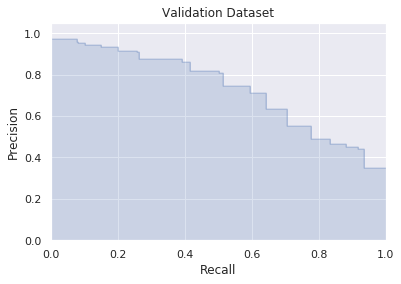

In [9]:
plt.step(rec, prec, color='b', alpha=0.2,
         where='post')
plt.fill_between(rec, prec, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Validation Dataset')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

eval test set using pre-computed threshold

In [10]:
pred = df_test.p_ious > best_thresh
prec = precision_score(df_test.ytrue, pred)
rec = recall_score(df_test.ytrue, pred)
f1 = f1_score(df_test.ytrue, pred)
print('f1: %.2f prec: %.2f rec: %.2f' % (f1 * 100, prec * 100, rec * 100))

f1: 67.10 prec: 67.23 rec: 66.97


In [11]:
best_thresh

0.2727272727272727

(0.0, 1.0)

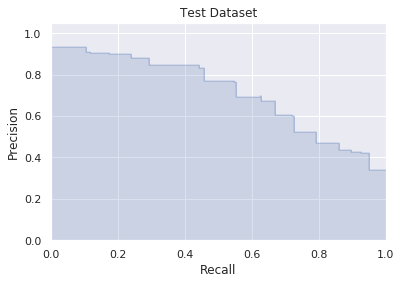

In [12]:
prec, rec, thresh = precision_recall_curve(df_test.ytrue, df_test.p_ious)
plt.step(rec, prec, color='b', alpha=0.2,
         where='post')
plt.fill_between(rec, prec, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Test Dataset')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])